In [1]:
# Import libraries
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import xgboost as xgb 
import numpy as np
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import graphviz

In [3]:
# Read in dataset
bookings= pd.read_csv('/Users/shubh/Desktop/AofAI/Week3/bookings.csv', index_col = "Unnamed: 0")
pd.set_option('display.max_columns', None)

In [4]:
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,meal_BB,meal_FB,meal_HB,meal_No_meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA_TO,market_segment_Online_TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA_TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,0,0,0,0,0,75.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,0,0,0,0,1,98.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [5]:
#Get the dimension of the dataset
bookings.shape
bookings.info()

(119210, 53)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

It looks like we have 53 columns with 119,210 rows. All the datatypes are numeric and ready for use.

In [6]:
# Take a closer look at column distributions
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,meal_BB,meal_FB,meal_HB,meal_No_meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA_TO,market_segment_Online_TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA_TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,0.031499,0.087191,0.137094,0.062553,0.571504,101.969092,0.056774,0.863434,0.664063,0.335937,0.773727,0.006694,0.121282,0.098297,0.001971,0.006107,0.044308,0.105545,0.166018,0.202852,0.473182,0.000017,0.055792,0.122565,0.001619,0.819982,0.000042,0.720351,0.009353,0.007810,0.160884,0.054685,0.024276,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,0.174663,0.844918,1.498137,0.245360,0.792876,50.434007,0.231411,0.343390,0.472319,0.472319,0.418420,0.081543,0.326456,0.297717,0.044356,0.077908,0.205780,0.307255,0.372098,0.402125,0.499282,0.004096,0.229521,0.327939,0.040204,0.384204,0.006476,0.448829,0.096259,0.088027,0.367426,0.227365,0.153907,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,

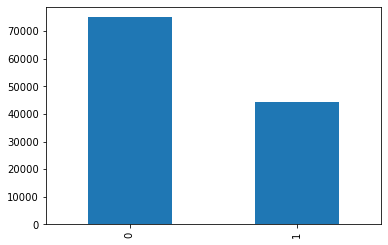

In [7]:
# Plot cancellation counts to visualize proportion of not cancelled and cancelled
bookings['is_canceled'].value_counts().plot(kind='bar')

Remember for our binary variables, like `is_canceled`, `1` = true and `0` = false.

In [8]:
# The target variable is a binary variable and we first examine its distributio
# Get an exact percentage of not cancelled and cancelled
bookings['is_canceled'].value_counts()
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()*100

0    75011
1    44199
Name: is_canceled, dtype: int64

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

In [9]:
# Compute correlation matrix 
bookings.corr()
corr_bookings = DataFrame(bookings.corr())
# Check the dimensions of the correlation matrix
corr_bookings.shape
# Write out correlation matrix to Excel; Examine correlations in Excel with Conditional Formatting 
corr_bookings.to_excel('/Users/shubh/Desktop/AofAI/Week3/corr_bookings.xlsx', sheet_name = 'corr_bookings', index= False)

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,meal_BB,meal_FB,meal_HB,meal_No_meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA_TO,market_segment_Online_TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA_TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.292876,0.008315,-0.005948,0.011179,-0.001323,0.025542,0.058182,0.004862,-0.032569,-0.083745,0.110139,-0.057365,-0.195701,-0.234877,0.046492,-0.099692,0.102218,0.137082,-0.137082,0.012786,0.038790,-0.020085,-0.006571,-0.013755,-0.040330,-0.081645,-0.154366,0.221990,-0.028671,-0.006232,0.005336,-0.075589,-0.151583,-0.014928,0.176005,0.005755,0.069117,-0.008372,-0.007336,-0.047736,-0.038882,-0.021778,-0.001672,0.005436,-0.000550,-0.477957,0.481507,-0.011345,-0.023690,-0.038842,0.133235,-0.124271
lead_time,0.292876,1.000000,0.127046,0.002306,0.131603,0.085985,0.166892,0.117575,-0.037886,-0.021003,-0.123209,0.086025,-0.073599,-0.116624,-0.095949,-0.065018,-0.125951,0.179563,0.075970,-0.075970,-0.039154,0.009646,0.136377,-0.097156,-0.041433,-0.066418,-0.165143,-0.174242,0.346418,0.146264,-0.186607,-0.003933,-0.134400,-0.161542,-0.031422,0.221546,-0.004915,0.104115,0.008561,-0.019798,-0.070515,-0.029329,-0.052407,-0.029744,-0.017132,-0.006911,-0.380173,0.380120,0.016564,0.068627,-0.031759,-0.174030,0.159538
arrival_date_week_number,0.008315,0.127046,1.000000,0.066572,0.995101,0.018629,0.016047,0.026567,0.005559,0.010417,-0.031125,0.035493,-0.021009,0.001980,0.026202,0.076281,-0.025516,0.032239,0.001241,-0.001241,-0.000361,0.021425,0.038426,-0.047495,-0.006805,0.007846,-0.017845,-0.016997,0.002940,0.068223,-0.039955,0.001457,0.007821,-0.016003,-0.003981,0.009370,0.002017,0.008490,0.007617,0.005359,-0.010173,-0.007899,0.002586,-0.002047,0.005354,0.001393,-0.005903,0.007831,-0.016901,0.090342,0.011246,-0.079507,0.042228
arrival_date_day_of_month,-0.005948,0.002306,0.066572,1.000000,-0.026335,-0.016225,-0.028362,-0.001754,0.014541,-0.000235,-0.006471,-0.027027,-0.000306,0.008569,0.003026,0.030291,-0.002831,-0.003920,-0.001678,0.001678,0.008278,-0.002570,-0.005223,-0.005203,-0.000984,-0.002985,-0.002046,0.004075,0.011860,-0.011060,-0.000997,-0.005504,-0.013528,0.011903,-0.001144,-0.001839,-0.007080,-0.017273,0.007001,0.001328,0.006459,0.011450,0.007613,0.004861,0.002873,-0.004012,0.005003,-0.008643,0.032171,-0.012178,-0.001704,-0.000426,0.006168
arrival_date_month,0.011179,0.131603,0.995101,-0.026335,1.000000,0.018851,0.019739,0.029239,0.005483,0.010193,-0.031709,0.037473,-0.021745,0.000325,0.028086,0.079828,-0.026905,0.034048,0.001770,-0.001770,-0.002757,0.021823,0.040014,-0.045978,-0.006961,0.007879,-0.019697,-0.017274,0.002607,0.067672,-0.038325,0.001919,0.006841,-0.017270,-0.004291,0.011059,0.002616,0.008491,0.006274,0.006447,-0.009870,-0.008189,0.002405,-0.001879,0.005222,0.001794,-0.006471,0.008809,-0.020520,0.091687,0.011457,-0.079496,0.041581
stays_in_weekend_nights,-0.001323,0.085985,0.018629,-0.016225,0.018851,1.000000,0.494175,0.094759,0.046134,0.018607,-0.086009,-0.012769,-0.042859,-0.018520,0.073124,0.050670,-0.108566,0.127345,-0.187816,0.187816,-0.065954,0.017596,0.105888,-0.028236,0.007819,-0.044784,-0.107029,-0.024834,-0.06

(53, 53)

In [10]:
# Which features are most correlated with is_cancelled?
bookings.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_Non_Refund           0.481507
lead_time                         0.292876
market_segment_Groups             0.221990
distribution_channel_TA_TO        0.176005
hotel_City                        0.137082
customer_type_Transient           0.133235
previous_cancellations            0.110139
booked_by_agent                   0.102218
reserved_room_type_A              0.069117
adults                            0.058182
avg_daily_rate                    0.046492
meal_FB                           0.038790
stays_in_week_nights              0.025542
meal_BB                           0.012786
arrival_date_month                0.011179
arrival_date_week_number          0.008315
distribution_channel_Undefined    0.005755
reserved_room_type_H              0.005436
market_segment_Undefined          0.005336
children                          0.004862
reserved_room_type_L             -0.000550
stays_in_weekend_nights          -0.001323
reserved_ro

In [11]:
# Define X and y
X, y = bookings.iloc[:,1:], bookings.iloc[:,0]

## Stratified KFold

In [12]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
models = {
    'xgboost': XGBClassifier(eta = 0.35, max_depth = 12)
    }

In [14]:
bookings["kfold"] = -1

# shuffling
bookings = bookings.sample(frac = 1).reset_index(drop = True)

# targets
target = bookings.is_canceled.values

# stratified k fold with 5 folds
kf = model_selection.StratifiedKFold(n_splits = 5)

for i, (train, val) in enumerate(kf.split(X = bookings, y = target)):
    bookings.loc[val, 'kfold'] = i

In [15]:
def run(folds, model):

    # training and validation set
    df_train = bookings[bookings.kfold != folds].reset_index(drop = True)
    df_valid = bookings[bookings.kfold == folds].reset_index(drop = True)

    X_train = df_train.drop(columns = ['is_canceled']).values
    y_train = df_train.is_canceled.values

    X_valid = df_valid.drop(columns = ['is_canceled']).values
    y_valid = df_valid.is_canceled.values

    clf = models[model]

    print ("Training...")
    clf.fit(X_train, y_train)

    print ("Done!!")
    preds = clf.predict(X_valid)
        
    acc = metrics.accuracy_score(y_valid, preds)
    print ("Fold = {} Accuracy = {}".format(folds, acc))
    print ("------Classification Report")
    print (metrics.classification_report(y_valid, preds))

In [16]:
# 5 Folds
for fold in range(0, 5):
    model = run(fold, 'xgboost')

Training...
Done!!
Fold = 0 Accuracy = 0.8523194362889019
------Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     15003
           1       0.83      0.75      0.79      8839

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842

Training...
Done!!
Fold = 1 Accuracy = 0.8544165757906216
------Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15002
           1       0.84      0.75      0.79      8840

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842

Training...
Done!!
Fold = 2 Accuracy = 0.8562620585521349
------Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92

In [17]:
# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=1234)

# Instatiate a XGBClassifier and call it xgb_clf
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

In [18]:
# Instantiate the XGBClassifier with 25 boosting rounds
xgb_clf = xgb.XGBClassifier(n_estimators=25, random_state=123)

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
#     'gamma': [0,0.001,1],
#     'random_state': [130],
    # max_depth: values from 3 to 12
    'max_depth': [7,9,10,11,12], #list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.001,0.01,0.5,0.9,1], #[0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.4,0.45,0.5,0.55,0.75], #[0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': [0.01,0.17,0.2,0.3,0.5,1], #np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10,40,41] #[50,90][10, 25, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_*100)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5, total=   6.1s
[CV] subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5, total=   5.9s
[CV] subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5 
[CV]  subsample=0.45, n_estimators=41, max_depth=12, learning_rate=1, alpha=0.5, total=   6.1s
[CV] subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5 
[CV]  subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5, total=   6.5s
[CV] subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5 
[CV]  subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5, total=   6.4s
[CV] subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5 
[CV]  subsample=0.5, n_estimators=41, max_depth=12, learning_rate=0.2, alpha=0.5, total=   6.3s
[CV] subsample=0.45, n_estimators=41, max_depth=10, learning_rate=1, alpha=0.9 
[CV]  subsample=0.45, n_estimators=41, max_depth=10, learning_rate=1, alpha=0.9, total=   5.0s
[CV] subsample=0.45, n_e

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=123, reg_alpha=None,
                                           reg_lambda=None,
                                           s

Best parameters found:  {'subsample': 0.5, 'n_estimators': 41, 'max_depth': 12, 'learning_rate': 0.2, 'alpha': 0.5}
Best accuracy found:  84.02654272001412


In [21]:
## ORIGINAL
# Best parameters found:  {'subsample': 0.5, 'n_estimators': 40,
# 'max_depth': 10, 'learning_rate': 0.17333333333333334, 
# 'alpha': 0.001}
# Best accuracy found:  83.60210341805434